In [1]:
import os
import cv2 #OpenCV
import numpy as np #Biblioteca Numerica
import matplotlib.pyplot as plt #Visualizaciones

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

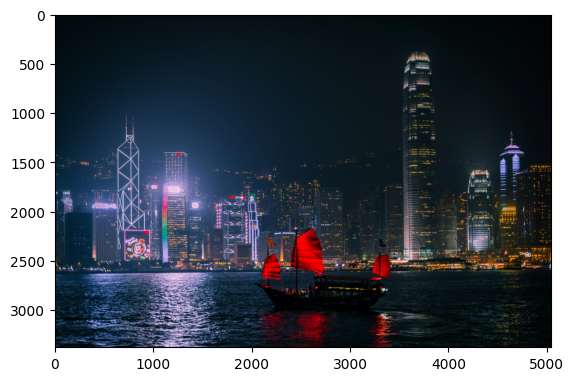

In [6]:
#Carga una imagen a color..
image = cv2.imread("hong_kong.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

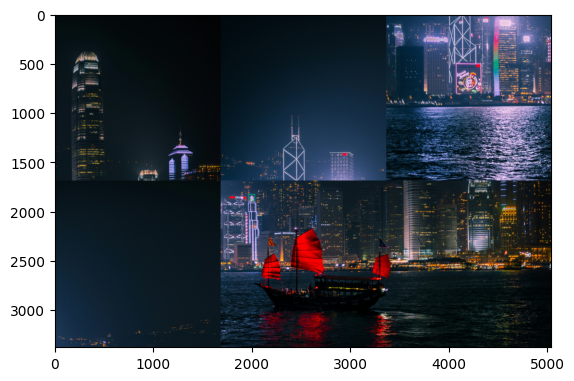

In [7]:
def intercambiar(image, region, orden):
    image_cropp = [None] * (region[0] * region[1])
    height = image.shape[0] // region[0]
    width = image.shape[1] // region[1]
    index = 0
    for i in range(region[0]):
        for j in range(region[1]):
            image_cropp[index] = image[height * i:height * (i + 1), width * j:width * (j + 1)]
            index += 1

    #Imagen resultante con las subregiones en el orden especificado
    result = np.zeros((height * region[0], width * region[1], 3), dtype=np.uint8)
    for i, pos in enumerate(orden):
        result[height * (i // region[1]):height * ((i // region[1]) + 1),
               width * (i % region[1]):width * ((i % region[1]) + 1)] = image_cropp[pos - 1]
    return result

region = (2, 3)
orden = [3, 1, 4, 2, 5, 6]
result = intercambiar(image, region, orden)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
